# 練習問題 2
glmnetの使い方は [GlmnetのGitHub](https://github.com/bbalasub1/glmnet_python/blob/master/test/glmnet_examples.ipynb) を参照すること。

## ライブラリインストール&インポート

In [1]:
!pip install -q glmnet_py

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glmnet_python
from glmnet import glmnet
from glmnetCoef import glmnetCoef
from glmnetPlot import glmnetPlot
from glmnetPredict import glmnetPredict
from glmnetPrint import glmnetPrint
from cvglmnet import cvglmnet
from cvglmnetPlot import cvglmnetPlot
from cvglmnetPredict import cvglmnetPredict

## データロード

In [3]:
df = pd.read_csv('QuickStartExample.csv', index_col = 0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,0.273856,-0.036672,0.854727,0.967524,1.415490,0.523406,0.562688,1.111223,1.640821,0.618707,...,-0.078419,-0.603326,0.033232,-0.700885,1.157838,1.457816,0.774907,-1.268518,1.993580,-1.274886
2,2.244817,-0.546030,0.234065,-1.335030,1.313076,0.521275,-0.610035,-0.861397,-0.270463,0.230083,...,0.163141,0.762077,0.678120,-0.528267,-0.879155,-0.472913,-1.117173,-0.737732,-1.078793,1.843425
3,-0.125423,-0.606878,-0.853922,-0.148777,-0.664683,0.606616,0.161721,-0.862722,0.604210,1.193977,...,-0.945206,0.398903,-0.764785,1.285402,0.644877,0.179246,0.044738,1.105307,0.304055,0.459236
4,-0.543573,1.108358,-0.104248,1.016526,0.699904,1.655016,0.489963,0.023382,0.256030,-0.127314,...,0.641955,0.075482,-1.378464,-1.024739,-2.118362,-0.469535,0.697796,0.865636,-0.789490,0.564041
5,-1.459398,-0.274495,0.111906,-0.851788,0.315284,1.050749,1.386358,0.284501,1.140498,2.681346,...,0.367044,1.737597,-1.266127,1.451999,-0.789476,-0.984386,-1.637010,-0.582917,-1.528910,1.872963


In [4]:
# データは正規化・中心化されているような気がするが、微妙にずれている……
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.206260,-0.005649,0.075553,0.118097,-0.061150,0.015337,0.035280,-0.121795,-0.083801,0.101245,...,-0.021086,-0.078445,-0.135802,-0.092212,0.063170,0.008150,-0.272371,0.115567,-0.052247,0.660758
std,1.046872,1.001628,1.012271,1.011842,0.941169,1.078522,0.977526,1.042773,0.991527,0.978356,...,1.021032,0.924324,1.102045,0.909788,0.938512,1.005079,1.001887,1.106123,0.886978,2.934434
min,-1.896130,-2.878895,-2.630615,-2.059281,-2.685431,-2.788028,-2.505489,-3.636728,-2.889850,-2.278949,...,-2.441669,-2.719544,-2.462191,-1.961105,-2.229293,-2.013222,-3.432539,-3.194422,-2.345777,-6.857485
25%,-0.473735,-0.656813,-0.639420,-0.615081,-0.804572,-0.782036,-0.662561,-0.861728,-0.730769,-0.546142,...,-0.882682,-0.651088,-0.924552,-0.706952,-0.603833,-0.635583,-0.864202,-0.514909,-0.719317,-1.681381
50%,0.200961,-0.099319,0.075500,0.066994,-0.093327,0.066459,0.095189,-0.142134,-0.098028,0.027150,...,0.035501,-0.025525,-0.124441,-0.259395,-0.003240,0.027832,-0.169398,0.200690,-0.079196,0.769698
75%,0.995152,0.731664,0.856114,0.868309,0.584079,0.707990,0.630506,0.593845,0.471608,0.817580,...,0.683275,0.401125,0.631884,0.531980,0.735593,0.588837,0.461695,0.961187,0.504026,2.903759
max,3.161921,2.228786,2.551548,3.112912,1.819809,2.275273,2.185734,2.653596,2.414872,2.681346,...,2.341620,2.756058,2.330065,2.250179,2.135153,2.563173,2.078923,2.594681,2.517911,6.265923


## Correlation

In [5]:
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 21)
df.corr().style.background_gradient(cmap='cool')
# pd.reset_option('max_') # pandasの表示数をデフォルトに戻す

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,1,-0.0808131,-0.0752986,-0.0600912,-0.0146793,0.143607,0.0246178,-0.129477,-0.0668624,-0.0210757,0.218241,-0.116363,0.00953352,0.0293868,0.0601682,0.011573,0.0621137,0.116354,0.0451347,-0.178251,0.558533
V2,-0.0808131,1,0.22018,-0.0876903,-0.0775106,0.0580634,-0.0261901,0.14565,-0.010236,0.0638923,0.0655999,-0.0369257,0.0316658,-0.0728745,0.0459036,-0.0404961,0.084822,0.0299992,-0.0809361,0.0377125,0.105957
V3,-0.0752986,0.22018,1,-0.236337,0.0192816,-0.00260882,0.102183,0.0678589,0.041961,0.0672951,-0.0278742,0.244088,0.0206235,-0.11997,-0.188498,-0.000814241,0.0476433,-0.156549,-0.0821977,0.0687559,0.259135
V4,-0.0600912,-0.0876903,-0.236337,1,-0.0975716,0.0888724,-0.0581162,-0.0745731,0.09299,-0.0966233,0.0771517,0.0603759,-0.131592,0.13749,-0.104251,0.000968387,0.155316,0.163827,0.0144428,0.0546521,-0.106879
V5,-0.0146793,-0.0775106,0.0192816,-0.0975716,1,-0.100996,-0.0397743,-0.0273798,-0.0722723,0.107442,-0.0588209,-0.141599,-0.060808,0.221764,0.0832691,-0.0920098,-0.134077,-0.0701382,0.0177579,-0.119241,-0.375676
V6,0.143607,0.0580634,-0.00260882,0.0888724,-0.100996,1,-0.0810703,-0.024175,0.157316,-0.0183784,-0.122456,-0.0325597,0.121586,-0.1133,-0.00492736,-0.0344334,0.0547286,-0.143172,-0.0621105,-0.0269628,0.364023
V7,0.0246178,-0.0261901,0.102183,-0.0581162,-0.0397743,-0.0810703,1,0.0605899,0.00586436,0.0274558,-0.0378063,0.0931954,0.0154444,0.0254586,0.106046,-0.125553,0.121039,-0.0706292,0.135772,-0.0703806,0.0827887
V8,-0.129477,0.14565,0.0678589,-0.0745731,-0.0273798,-0.024175,0.0605899,1,0.0828345,-0.0628697,0.0260723,0.0195847,0.0162971,-0.0736591,-0.0471521,0.0981271,0.0449186,0.0635178,-0.0664398,-0.0967107,0.165664
V9,-0.0668624,-0.010236,0.041961,0.09299,-0.0722723,0.157316,0.00586436,0.0828345,1,0.136724,-0.0640739,0.100844,0.0728362,0.057637,-0.0928392,-0.0394802,-0.0157346,-0.057992,0.0599582,0.223239,-0.0649747
V10,-0.0210757,0.0638923,0.0672951,-0.0966233,0.107442,-0.0183784,0.0274558,-0.0628697,0.136724,1,-0.0187057,0.0293524,0.066976,0.15452,0.191806,0.0568527,-0.17592,-0.126316,0.0242752,0.0080816,-0.0762032


In [6]:
# V1～V20のカラムを説明変数、V21のカラムを目的変数として格納する
x = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values

## Glmnet
### 解パス図
λの値の増加に伴い、説明変数の係数が0に近づく様子を可視化する。

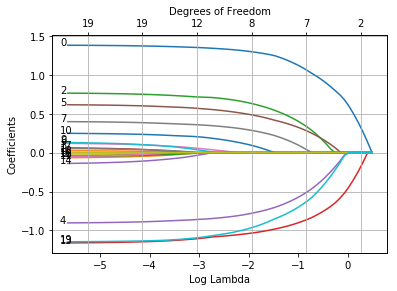

In [7]:
fit = glmnet(x = x, y = y)
glmnetPlot(fit, xvar = 'lambda', label = True);

### LambdaとRMSEの関係

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/glmnet_python/cvglmnetPlot.py:82: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


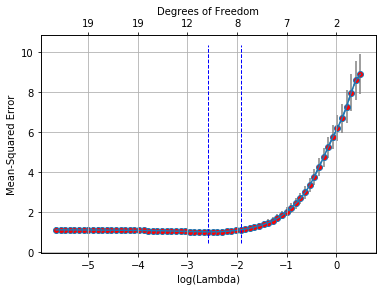

RMSEが最小となるlambdaは[0.07569327]


In [8]:
np.random.seed(0)

k = 10 # K-fold cross-validation
foldid = np.random.choice(k, size = y.shape[0], replace = True)
cvfit = cvglmnet(x = x, y = y, foldid = foldid)

fig = plt.figure()
ax = fig.add_subplot(111)
cvglmnetPlot(cvfit)
plt.show()

print('RMSEが最小となるlambdaは{}'.format(cvfit['lambda_min']))

RMSEが最小となるlambdaを使って、yとy_hatの関係をプロットする。<br>
ほぼy = xの直線状に分布し、良く推定できていることがわかる。

In [9]:
y_hat = cvglmnetPredict(cvfit, newx = x, s = 'lambda_min')

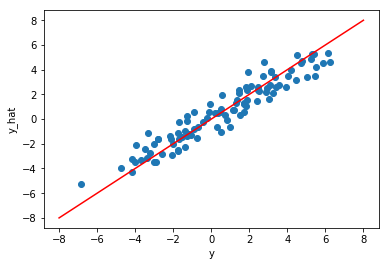

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y, y_hat)
ax.plot([-8, 8], [-8, 8], color = 'red')
ax.set_xlabel('y')
ax.set_ylabel('y_hat')

plt.show()